### First we follow simple approach for this task if we don't get good accuracy then we go for advanced version of this task

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import xgboost as xgb

# Load data
data = pd.read_csv(r"C:\ML Projects\DS-Intern-Assignment-Faheem-Khan\data\data.csv")

In [22]:
data.head()


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,1/11/2016 17:00,60,-77.78778597,33.74660934,47.59666667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,1/11/2016 17:10,60,30,19.89,46.69333333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,1/11/2016 17:20,50,30,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,1/11/2016 17:30,50,40,33.74660934,46.06666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410390,45.410390
4,1/11/2016 17:40,60,40,19.89,46.33333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#### Data statistics and info about dataset

In [23]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


#### Data Cleaning

#### Convert timestamp into datetime Convert numeric columns to float

In [24]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Convert numeric columns to float
numeric_cols = [col for col in data.columns if col != 'timestamp']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Updated Data Types:")
print(data.dtypes)

Updated Data Types:
timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         f

In [25]:
# check for duplicates and drop them if any
duplicates = data.duplicated().sum()
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print(f"Removed {duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")
    
    
# --- 4. Handle NaN Values ---
# Drop rows where target is NaN
data = data.dropna(subset=['equipment_energy_consumption'])
print("\nShape after dropping rows with missing target:", data.shape)

Removed 68 duplicate rows.

Shape after dropping rows with missing target: (15880, 29)


#### Handle negitive values 

In [26]:
# --- 5. Handle Negative Values ---
non_negative_cols = [
    'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity',
    'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_humidity', 'wind_speed', 'visibility_index', 'lighting_energy'
]

for col in non_negative_cols:
    if (data[col] < 0).any():
        median_non_negative = data[data[col] >= 0][col].median()
        num_negatives = (data[col] < 0).sum()
        data.loc[data[col] < 0, col] = median_non_negative
        print(f"Replaced {num_negatives} negative values in '{col}' with median of non-negative values: {median_non_negative}")

plausible_negative_cols = [
    'outdoor_temperature', 'dew_point', 'zone6_temperature',
    'random_variable1', 'random_variable2'
]


for col in plausible_negative_cols:
    if (data[col] < 0).any():
        median_value = data[data[col] >= 0][col].median()
        num_negatives = (data[col] < 0).sum()
        data.loc[data[col] < 0, col] = median_value
        print(f"Replaced {num_negatives} negative values in '{col}' with median of non-negative values: {median_value}")

print("\nRetained negative values in plausible columns:", plausible_negative_cols)

Replaced 132 negative values in 'zone2_humidity' with median of non-negative values: 40.33333333
Replaced 177 negative values in 'zone3_humidity' with median of non-negative values: 38.4
Replaced 324 negative values in 'zone4_humidity' with median of non-negative values: 38.2
Replaced 289 negative values in 'zone5_humidity' with median of non-negative values: 49.0
Replaced 285 negative values in 'zone6_humidity' with median of non-negative values: 63.9
Replaced 331 negative values in 'zone7_humidity' with median of non-negative values: 34.378
Replaced 309 negative values in 'zone8_humidity' with median of non-negative values: 42.16333333
Replaced 173 negative values in 'zone9_humidity' with median of non-negative values: 40.46666667
Replaced 286 negative values in 'outdoor_humidity' with median of non-negative values: 84.66666667
Replaced 162 negative values in 'wind_speed' with median of non-negative values: 4.0
Replaced 173 negative values in 'visibility_index' with median of non-neg

#### find multicolinearity using VIF

In [27]:
# Temporary imputation for VIF calculation
data_temp = data.drop('timestamp', axis=1).copy()
data_temp.fillna(data_temp.median(), inplace=True)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each column
vif_scores = [variance_inflation_factor(data_temp.values, i) for i in range(data_temp.shape[1])]
vif_df = pd.DataFrame({'Column': data_temp.columns, 'VIF': vif_scores}).sort_values('VIF', ascending=False)

# Print VIF scores
print("VIF Scores for Each Column:")
print(vif_df)

VIF Scores for Each Column:
                          Column         VIF
21          atmospheric_pressure  362.058534
2              zone1_temperature  121.604579
6              zone3_temperature   88.211378
10             zone5_temperature   83.254571
18             zone9_temperature   73.170815
7                 zone3_humidity   70.882928
16             zone8_temperature   66.071857
8              zone4_temperature   65.771168
9                 zone4_humidity   61.752166
14             zone7_temperature   59.003252
4              zone2_temperature   57.548568
17                zone8_humidity   51.868799
19                zone9_humidity   46.673105
5                 zone2_humidity   45.341905
15                zone7_humidity   42.600023
22              outdoor_humidity   27.921857
3                 zone1_humidity   18.777850
11                zone5_humidity   18.298103
24              visibility_index    6.855472
13                zone6_humidity    4.989670
20           outdoor_temper

In [29]:
# Create average zone temperature and humidity
zone_temp_cols = [col for col in data.columns if 'zone' in col and 'temperature' in col]
zone_hum_cols = [col for col in data.columns if 'zone' in col and 'humidity' in col]
data['avg_zone_temp'] = data[zone_temp_cols].mean(axis=1)
data['avg_zone_humidity'] = data[zone_hum_cols].mean(axis=1)

# Drop individual zone features, atmospheric_pressure, random variables, and dew_point
data = data.drop(zone_temp_cols + zone_hum_cols + ['atmospheric_pressure', 'random_variable1', 'random_variable2', 'dew_point'], axis=1)

# Recalculate VIF to confirm
data_temp = data.drop('timestamp', axis=1).copy()
data_temp.fillna(data_temp.median(), inplace=True)
vif_scores_new = [variance_inflation_factor(data_temp.values, i) for i in range(data_temp.shape[1])]
vif_df_new = pd.DataFrame({'Column': data_temp.columns, 'VIF': vif_scores_new}).sort_values('VIF', ascending=False)
print("Updated VIF Scores:")
print(vif_df_new)

Updated VIF Scores:
                         Column        VIF
7             avg_zone_humidity  37.743203
6                 avg_zone_temp  33.123169
3              outdoor_humidity  24.443703
5              visibility_index   6.663187
2           outdoor_temperature   3.039582
4                    wind_speed   2.743868
0  equipment_energy_consumption   1.285697
1               lighting_energy   1.176719


#### EDA

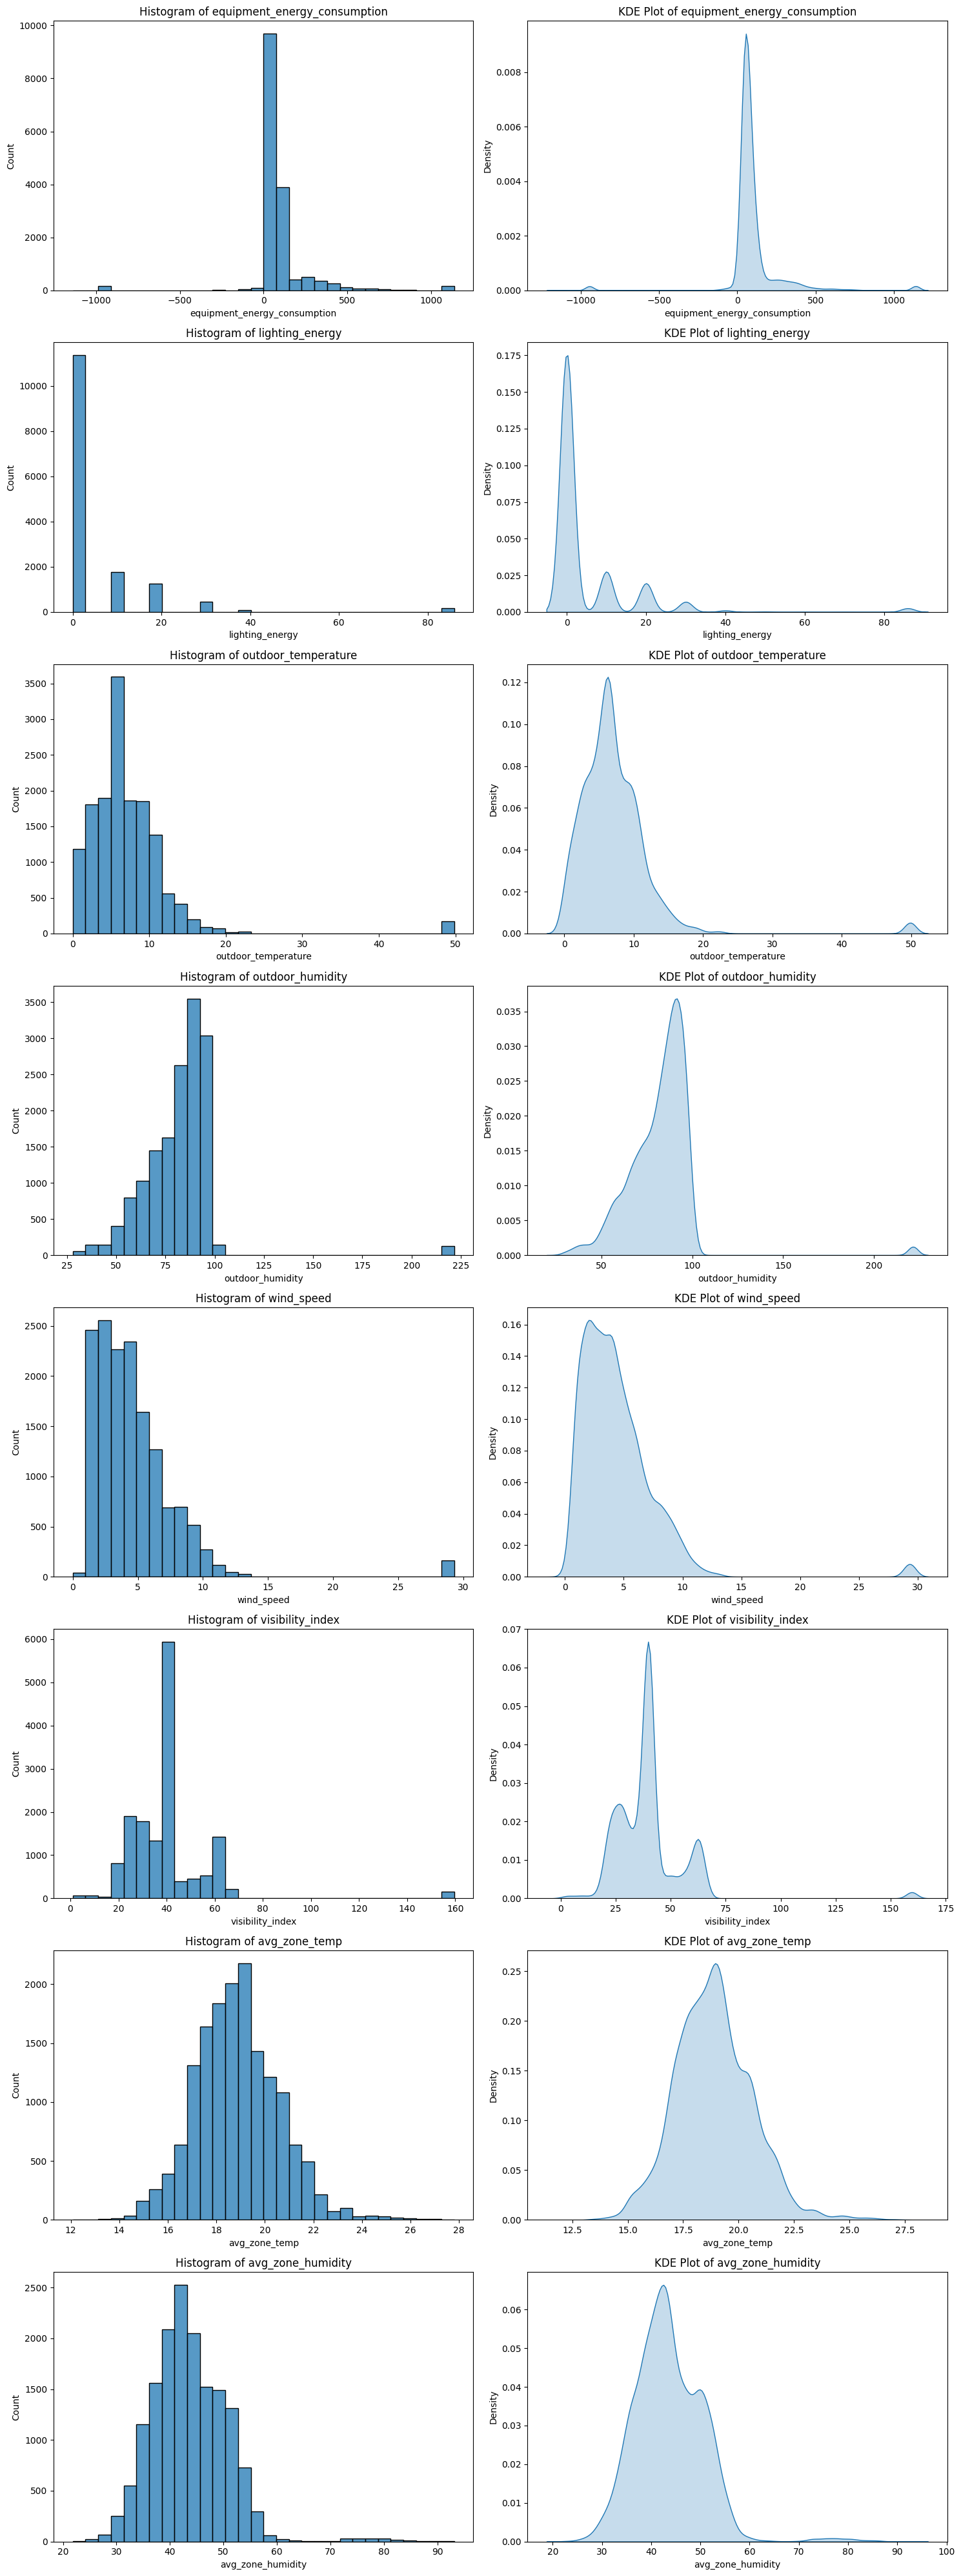

In [30]:
# Numerical columns ke liye distribution plot
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Subplots create karna
plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i-1)
    sns.histplot(data[col], kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.kdeplot(data[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [31]:
# Sort by timestamp
data = data.sort_values('timestamp')

# Forward-fill
data.fillna(method='ffill', inplace=True)

# fillna for remaining NaN values with median
# Check for remaining NaN values
print("Missing Values Before Imputation:")
print(data.isnull().sum())
for col in data.keys():
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Verify
print("Missing Values After Imputation:")
print(data.isnull().sum())

Missing Values Before Imputation:
timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
outdoor_temperature             0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
avg_zone_temp                   0
avg_zone_humidity               0
dtype: int64
Missing Values After Imputation:
timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
outdoor_temperature             0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
avg_zone_temp                   0
avg_zone_humidity               0
dtype: int64


C:\Users\fahee\AppData\Local\Temp\ipykernel_16164\2878010234.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [32]:
print("Summary Statistics Post-Imputation:")
print(data.describe())

Summary Statistics Post-Imputation:
                           timestamp  equipment_energy_consumption  \
count                          15880                  15880.000000   
mean   2016-03-10 02:24:14.093199104                     95.787256   
min              2016-01-11 17:00:00                  -1139.985693   
25%              2016-02-09 22:17:30                     50.000000   
50%              2016-03-09 23:45:00                     60.000000   
75%              2016-04-08 03:02:30                    100.000000   
max              2016-12-01 15:50:00                   1139.985693   
std                              NaN                    182.525447   

       lighting_energy  outdoor_temperature  outdoor_humidity    wind_speed  \
count     15880.000000         15880.000000      15880.000000  15880.000000   
mean          4.891594             7.176915         82.023355      4.463684   
min           0.000000             0.000000         28.000000      0.000000   
25%           0.0

##### As we can see the our target variable [equipment_energy_consumption] contain negetive values we replace it with median of positive values

In [33]:
# As we can see the our target variable [equipment_energy_consumption] contain negetive values we replace it with median of positive values
median_positive = data[data['equipment_energy_consumption'] > 0]['equipment_energy_consumption'].median()
data.loc[data['equipment_energy_consumption'] < 0, 'equipment_energy_consumption'] = median_positive
print(f"Replaced negative values in 'equipment_energy_consumption' with median of positive values: {median_positive}")
# Check for remaining negative values
remaining_negatives = data[data['equipment_energy_consumption'] < 0]['equipment_energy_consumption'].count()
if remaining_negatives > 0:
    print(f"Remaining negative values in 'equipment_energy_consumption': {remaining_negatives}")
else:
    print("No remaining negative values in 'equipment_energy_consumption' after replacement.")

Replaced negative values in 'equipment_energy_consumption' with median of positive values: 60.0
No remaining negative values in 'equipment_energy_consumption' after replacement.
